<center>

# Esercizio 3

</center>

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [58]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [59]:
#Genero i dataset di training e controllo
np.random.seed(0)

Ntrain = 5000
Ntest = 500

#Ascisse e ordinate per trainig
x_train = np.random.uniform(-1.5, 1.5, Ntrain)
y_train = np.random.uniform(-1.5, 1.5, Ntrain)

#Ascisse e orinate per validation
x_valid = np.random.uniform(-1.5, 1.5, Ntest)
y_valid = np.random.uniform(-1.5, 1.5, Ntest)

#Riordino in ordine crescente ascisse e ordinate per validazione
x_valid.sort()
y_valid.sort()

#Calcolo valore della funzione per test
z_target = np.sin(pow(x_valid, 2) + pow(y_valid, 2))

#Genero rumori su valori di z per training e test
sigma = 0.1 # noise standard deviation
z_train = np.random.normal(np.sin(pow(x_train, 2) + pow(y_train, 2)),sigma)
z_valid = np.random.normal(np.sin(pow(x_valid, 2) + pow(y_valid, 2)),sigma)

In [60]:
model = tf.keras.Sequential([
    keras.layers.Dense(120, activation='relu', input_shape=(2,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1)
])

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse')

history = model.fit(x=np.column_stack((x_train,y_train)), y=z_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(np.column_stack((x_valid,y_valid)), z_valid))


Epoch 1/20
157/157 [==============================] - 1s 3ms/step - loss: 0.1546 - val_loss: 0.2624
Epoch 2/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0785 - val_loss: 0.0888
Epoch 3/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0262 - val_loss: 0.0254
Epoch 4/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.0171
Epoch 5/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0136
Epoch 6/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0132
Epoch 7/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0126 - val_loss: 0.0134
Epoch 8/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0133
Epoch 9/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.0254
Epoch 10/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0173

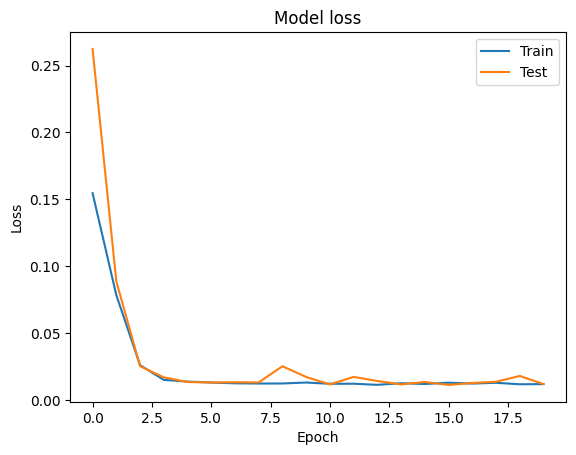

In [61]:
appo = history.history['loss']
pippo = history.history['val_loss']

plt.plot(appo)
plt.plot(pippo)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

313/313 [==============================] - 1s 2ms/step


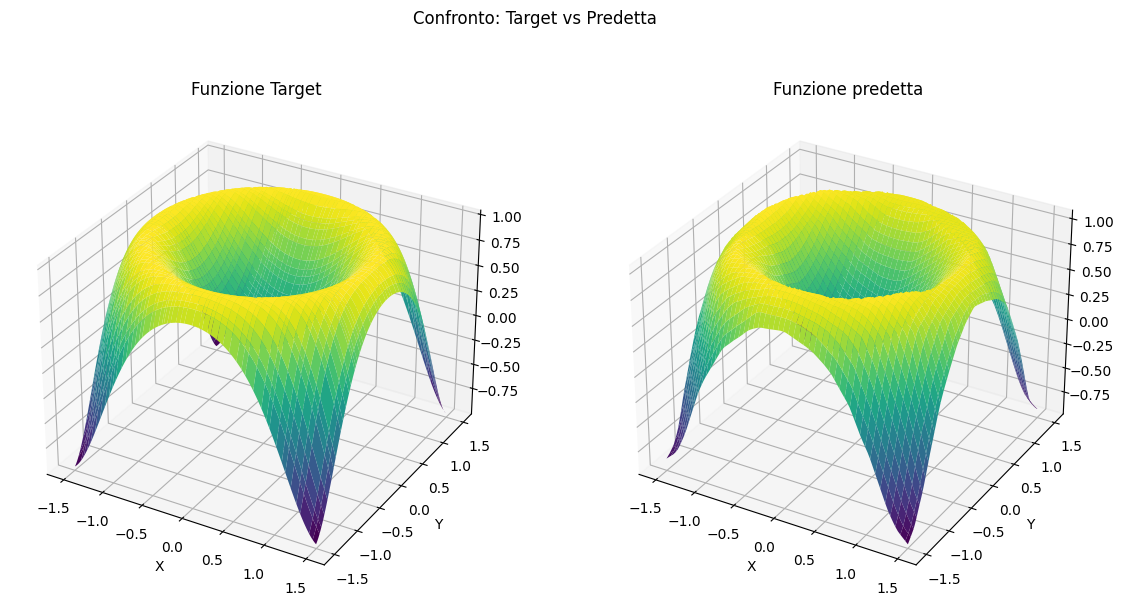

In [62]:
# Definizione della funzione di due variabili
def my_function(x, y):
    return np.sin(pow(x, 2) + pow(y, 2))

# Generazione dei dati per il plot
x = x_valid
y = y_valid
X, Y = np.meshgrid(x, y)
Z = my_function(X, Y)

# Creazione del grafico 3D
fig = plt.figure(figsize = (14, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('Funzione Target')

# Personalizzazione dell'aspetto del grafico
ax1.set_xlabel('X')
ax1.set_ylabel('Y')


# Generazione dei dati per il plot
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = model.predict(np.column_stack((X.flatten(), Y.flatten()))).reshape(X.shape)


ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')

# Personalizzazione dell'aspetto del grafico
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Funzione predetta')


fig.suptitle('Confronto: Target vs Predetta')
plt.show()